## Using machine learning algorithm for classification of number images from mnist dataset.

In [1]:
# Importing the basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Loading mnist_784 dataset.

from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784')


 28 * 28 = 784. So total number of pixels in an Image is 784
 In flattening operation we will just arrange all these
 pixels in a single line.


In [3]:
# Setting feature matrix and target vector
X = dataset.data
y = dataset.target
y = y.astype(np.int32)

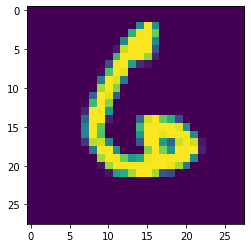

In [4]:
# Checking a random image
some_digit = X[6982]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image)
plt.show()

In [5]:
# Applying decision tree algoritm with depth of 3
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier(max_depth = 3)
dtf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
# Checking the score of dtf
dtf.score(X, y)

0.44238571428571427

We have got a score of 44% only which very low and not acceptable. So, we will go ahead for fine tuning.

In [7]:
# Getting the predictions
y_pred = dtf.predict(X)

In [8]:
# Checking the confusion matrix so created
# y is the vector of observations
# y_pred is the vector of prediction

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
cm

array([[5646,   62,    0,  177,   35,  279,  131,  535,   38,    0],
       [  17, 6710,    0,  358,  228,   28,  387,   25,  124,    0],
       [ 595,  492,    0,  374,  775,   27, 4022,  152,  553,    0],
       [ 209,  177,    0, 4556,  981,  661,  139,  109,  309,    0],
       [  12,  187,    0,  102, 4950,  201,  757,  490,  125,    0],
       [ 622,  260,    0,  743, 1965, 1548,  663,  464,   48,    0],
       [ 243,  446,    0,  298,  370,  295, 4480,  419,  325,    0],
       [  49,   76,    0,   61, 4076,  233,  793, 1774,  231,    0],
       [  93,  698,    0,  558,  724,  762, 2639,   48, 1303,    0],
       [  26,  168,    0,  181, 4517,  825,  527,  462,  252,    0]],
      dtype=int64)

In [9]:
# Fine tuning by increasing the depth of the tree
dtf_1 = DecisionTreeClassifier(max_depth = 13)
dtf_1.fit(X, y)

dtf_1.score(X, y)

0.9633714285714285

This time the score is very high and acceptable.

In [10]:
# Getting the predictons
y_pred_1=dtf_1.predict(X)

In [11]:
# Checking the confusion matrix of new predictions.
cm=confusion_matrix(y, y_pred_1)
cm

array([[6830,    1,   34,    5,    2,    8,   11,    1,    7,    4],
       [   1, 7784,   17,   18,    6,    7,    5,   11,   26,    2],
       [  17,   28, 6759,   49,   30,   11,   19,   33,   18,   26],
       [  11,   22,   92, 6760,   23,   81,   17,   30,   46,   59],
       [   8,   11,   23,   11, 6534,    5,   17,   20,   56,  139],
       [  26,   19,   13,  106,   27, 6001,   41,    4,   45,   31],
       [  20,   27,   23,   14,   22,   24, 6709,    5,   29,    3],
       [   9,   26,   40,   33,   33,   11,    1, 7063,    8,   69],
       [   9,   63,   61,   33,   32,   25,   52,   21, 6442,   87],
       [  14,   11,   42,   47,  102,   49,   11,   73,   55, 6554]],
      dtype=int64)

Let's compare first few images with predictions.

In [12]:
y_pred[:50].reshape(5,10)

array([[4, 0, 4, 1, 4, 6, 1, 4, 1, 4],
       [3, 7, 3, 6, 1, 4, 4, 6, 7, 4],
       [4, 0, 4, 1, 6, 3, 4, 3, 6, 6],
       [8, 1, 6, 1, 5, 3, 6, 0, 4, 6],
       [1, 8, 4, 4, 3, 4, 6, 4, 5, 3]])

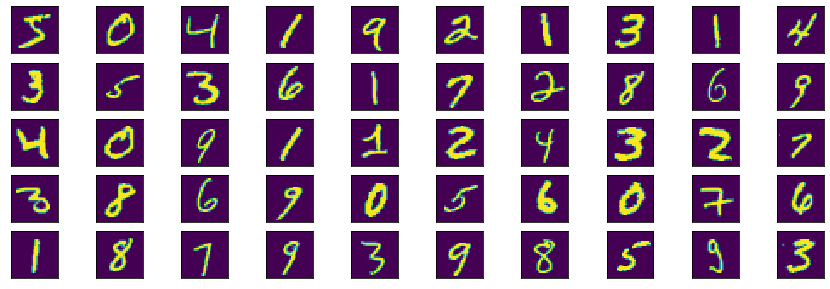

In [13]:
plt.figure(figsize=(15,5))
for i in range(50):
    image = X[i]
    image = image.reshape(28, 28)
    plt.subplot(5, 10, i+1)
    plt.xticks([]) # empty list to avoid ticks
    plt.yticks([])
    plt.imshow(image)
plt.show()